In [39]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [131]:
def plot_sorted_weights(outputs, type="UNNAMED"):
    fig, axes = plt.subplots(2, 1, figsize=(8, 8))

    # get initial and final weights
    W_init = outputs["initial_state_dict"]["hidden_linear.weight"].numpy()
    W_final = outputs["final_state_dict"]["hidden_linear.weight"].cpu().numpy()

    # sort
    idx_init = np.argsort(np.argmax(W_init, axis=1))
    idx_final = np.argsort(np.argmax(W_final, axis=1))

    vmax = 0.2

    axes[0].imshow(W_init[idx_init][:, idx_init], cmap="RdBu_r", vmin=-vmax, vmax=vmax)
    im = axes[1].imshow(
        W_final[idx_final][:, idx_final], cmap="RdBu_r", vmin=-vmax, vmax=vmax
    )
    axes[0].set_title(f"Initial Hidden Weights ({type})")
    axes[1].set_title(f"Learned Hidden Weights ({type})")

    cbar_ax = fig.add_axes([0.8, 0.05, 0.03, 0.9])  # [left, bottom, width, height]
    fig.colorbar(im, cax=cbar_ax)

    for i in range(2):
        axes[i].set_xlabel("Presynaptic neuron")
        axes[i].set_ylabel("Postsynaptic neuron")

    plt.tight_layout()
    plt.show()

In [132]:
baseline = torch.load("../Elman_SGD/predloss/no-mask/all-xavier-07092025.pth.tar")

In [137]:
outputs = torch.load("../Elman_SGD/predloss/noise/orthog-0.1-07152025.pth.tar")

In [ ]:
# np.diagonal(outputs["initial_state_dict"]["hidden_linear.weight"].numpy())
# np.diagonal(outputs["initial_state_dict"]["hidden_linear.weight"].numpy(), offset=1)
# np.diagonal(outputs["initial_state_dict"]["hidden_linear.weight"].numpy(), offset=-2)
# shift["initial_state_dict"]["hidden_linear.weight"].numpy()[-1, 0]
# cyclic["initial_state_dict"]["hidden_linear.weight"].numpy()[-1, 0]

/home/mwagner/bin/anaconda3/envs/hcprediction/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


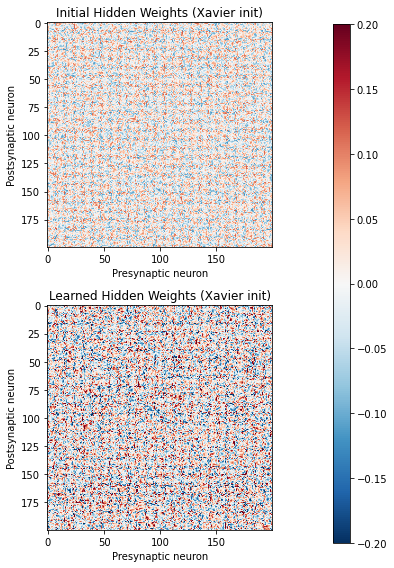

In [134]:
plot_sorted_weights(baseline, type="Xavier init")

/home/mwagner/bin/anaconda3/envs/hcprediction/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


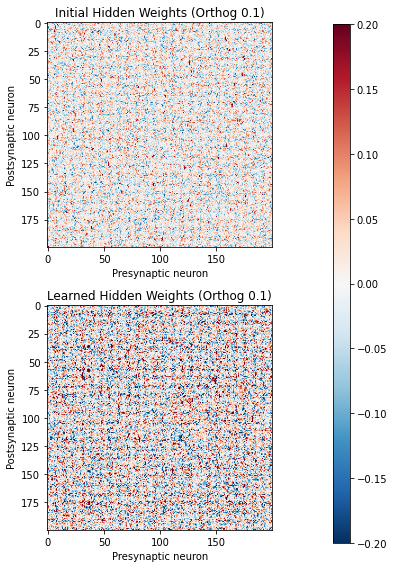

In [138]:
plot_sorted_weights(outputs, type="Orthog 0.1")

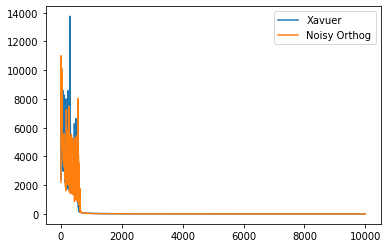

In [ ]:
start_x = 0

plt.plot(baseline["loss"][start_x:], label="Xavier")
plt.plot(outputs["loss"][start_x:], label="Noisy Orthog")
plt.legend()
plt.show()

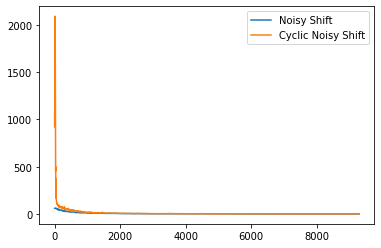

In [130]:
start_x = 700

plt.plot(shift["loss"][start_x:], label="Noisy Shift")
plt.plot(cyclic["loss"][start_x:], label="Cyclic Noisy Shift")
plt.legend()
plt.show()

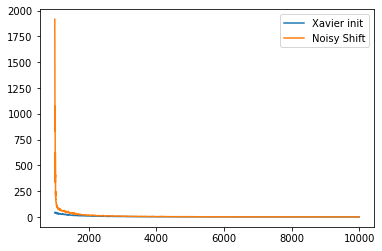

In [86]:
start_x = 1000

plt.plot(range(start_x, 10000), baseline["loss"][start_x:], label="Xavier init")
plt.plot(range(start_x, 10000), outputs["loss"][start_x:], label="Noisy Shift")
plt.legend()
plt.show()

/home/mwagner/bin/anaconda3/envs/hcprediction/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


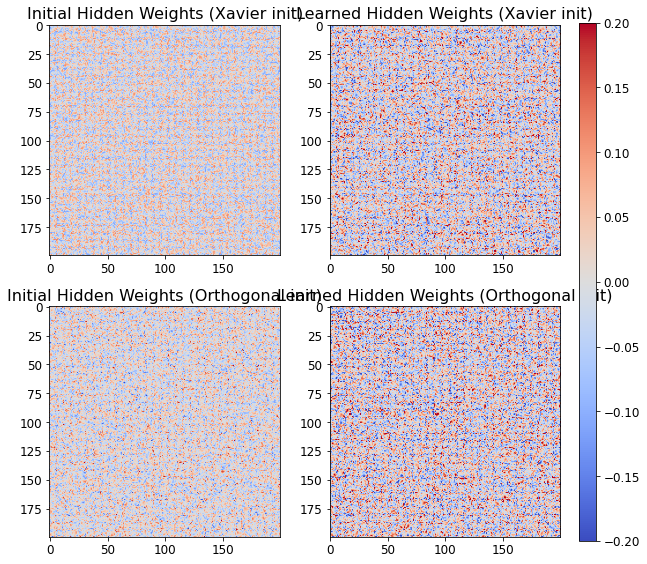

In [123]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

images = [
    baseline["initial_state_dict"]["hidden_linear.weight"].numpy(),
    baseline["final_state_dict"]["hidden_linear.weight"].cpu().numpy(),
    outputs["initial_state_dict"]["hidden_linear.weight"].numpy(),
    outputs["final_state_dict"]["hidden_linear.weight"].cpu().numpy(),
]

titles = [
    "Initial Hidden Weights (Xavier init)",
    "Learned Hidden Weights (Xavier init)",
    "Initial Hidden Weights (Orthogonal init)",
    "Learned Hidden Weights (Orthogonal init)",
]

vmin = -0.2
vmax = 0.2

ims = []
i = 0
for ax, img in zip(axes.flat, images):
    im = ax.imshow(img, cmap="coolwarm", vmin=vmin, vmax=vmax)
    ax.set_title(titles[i])
    i += 1

# shared colorbar
cbar_ax = fig.add_axes([1, 0.05, 0.03, 0.9])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax)

plt.tight_layout()
plt.show()